<a href="https://colab.research.google.com/github/Shirley31415926/API_heatwave/blob/main/Temperature_Anomalies_vs_Sentiment_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. correlation analysis

In [1]:
# ✅ Step 1: Import libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

## 2023

In [ ]:
# ✅ Step 2: Load the data
sentiment_df = pd.read_csv('2023daily_sentiment.csv')
temp_df = pd.read_csv('lsm2023.csv')

# Clean temperature data: rename columns
temp_df.columns = ['Date', 'Temp_Anomaly']

# Ensure temperature anomaly values are numeric (strip spaces, convert invalid values to NaN)
temp_df['Temp_Anomaly'] = pd.to_numeric(temp_df['Temp_Anomaly'], errors='coerce')

# Add full year to the date and convert to datetime
temp_df['Date'] = pd.to_datetime('2023-' + temp_df['Date'], format='%Y-%m-%d', errors='coerce')

# Clean sentiment data
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.date
temp_df['Date'] = temp_df['Date'].dt.date  # Remove time component

# Merge the two dataframes on the date
merged_df = pd.merge(sentiment_df, temp_df, on='Date')


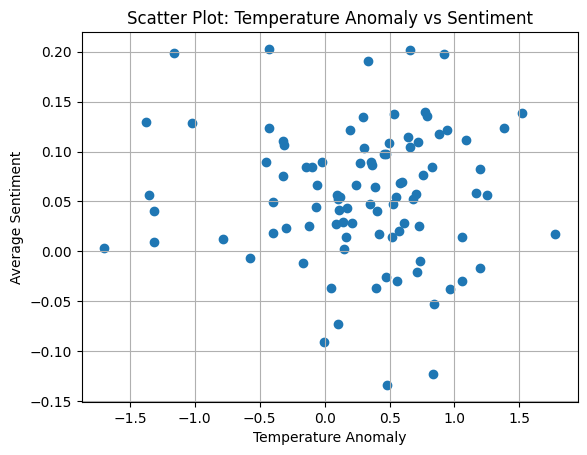

In [ ]:
# ✅ Step 3: Visualize the scatter plot
plt.scatter(merged_df['Temp_Anomaly'], merged_df['Average_Sentiment'])
plt.xlabel('Temperature Anomaly')
plt.ylabel('Average Sentiment')
plt.title('Scatter Plot: Temperature Anomaly vs Sentiment')
plt.grid(True)
plt.show()

In [ ]:
# ✅ Step 4: Calculate Pearson and Spearman correlation coefficients
pearson_corr, pearson_p = pearsonr(merged_df['Temp_Anomaly'], merged_df['Average_Sentiment'])
spearman_corr, spearman_p = spearmanr(merged_df['Temp_Anomaly'], merged_df['Average_Sentiment'])

print("📊 Pearson correlation coefficient: {:.3f}, p-value: {:.4f}".format(pearson_corr, pearson_p))
print("📊 Spearman correlation coefficient: {:.3f}, p-value: {:.4f}".format(spearman_corr, spearman_p))


📊 Pearson 相关系数: -0.033, p-value: 0.7494
📊 Spearman 相关系数: 0.031, p-value: 0.7638


### 2024

In [ ]:
# ✅ Step 2: Load the data
sentiment_df = pd.read_csv('2024daily_sentiment.csv')
temp_df = pd.read_csv('lsm2024.csv')

# Clean temperature data: rename columns
temp_df.columns = ['Date', 'Temp_Anomaly']

# Ensure temperature anomaly values are numeric (automatically strip whitespace and set invalid values to NaN)
temp_df['Temp_Anomaly'] = pd.to_numeric(temp_df['Temp_Anomaly'], errors='coerce')

# Append year to date and convert to datetime format
temp_df['Date'] = pd.to_datetime('2024-' + temp_df['Date'], format='%Y-%m-%d', errors='coerce')

# Clean sentiment data
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.date
temp_df['Date'] = temp_df['Date'].dt.date  # Remove time component

# Merge the two datasets on the Date column
merged_df = pd.merge(sentiment_df, temp_df, on='Date')

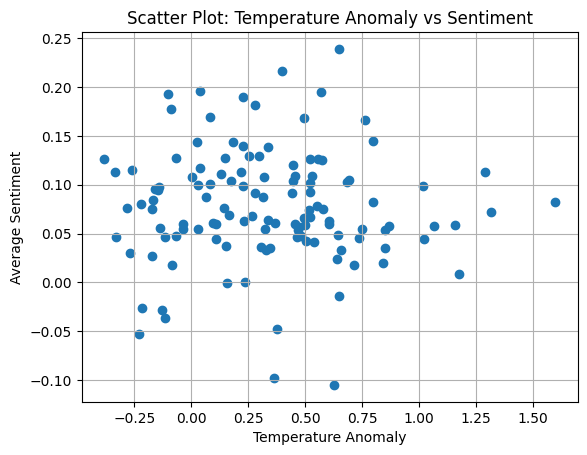

In [ ]:
# ✅ Step 3: Visualize the scatter plot
plt.scatter(merged_df['Temp_Anomaly'], merged_df['Average_Sentiment'])
plt.xlabel('Temperature Anomaly')
plt.ylabel('Average Sentiment')
plt.title('Scatter Plot: Temperature Anomaly vs Sentiment')
plt.grid(True)
plt.show()


In [ ]:
# ✅ Step 4: Calculate Pearson and Spearman correlation coefficients
pearson_corr, pearson_p = pearsonr(merged_df['Temp_Anomaly'], merged_df['Average_Sentiment'])
spearman_corr, spearman_p = spearmanr(merged_df['Temp_Anomaly'], merged_df['Average_Sentiment'])

print("📊 Pearson correlation coefficient: {:.3f}, p-value: {:.4f}".format(pearson_corr, pearson_p))
print("📊 Spearman correlation coefficient: {:.3f}, p-value: {:.4f}".format(spearman_corr, spearman_p))

📊 Pearson 相关系数: -0.029, p-value: 0.7472
📊 Spearman 相关系数: -0.072, p-value: 0.4277


# 2.Mann-Kendall Trend Test


1. 清洗 & 合并数据：把 2023 和 2024 的情绪 + 温度数据合并到一起（按照日期）
2. 分别做 Mann-Kendall 趋势检验，对比：两年情绪是否都在变化？ 温度异常是否不同？
3. 可视化对比（趋势图 + 分布图）


1. Clean & Merge Data
Merge the 2023 and 2024 sentiment and temperature datasets by date.
2. Mann-Kendall Trend Test
Conduct the Mann-Kendall trend test separately for each year to compare:
Is sentiment changing over time in both years?
Are temperature anomalies showing different trends?
3. Visual Comparison
Use visualizations to compare:
Trend plots (e.g., line plots with smoothers)
Distribution plots (e.g., histograms or KDE)

# 3.OSL trend

In [ ]:
import pandas as pd

# Load the uploaded CSV file (make sure the filename matches)
df_all = pd.read_csv("2023和2024的放在一起.csv")  # "Combined 2023 and 2024.csv"

# Clean column names and convert date format
df_all.columns = [col.strip() for col in df_all.columns]
df_all['Date'] = pd.to_datetime(df_all['Date'])

import statsmodels.api as sm

# Define a trend analysis function
def trend_analysis(df, column_name):
    df = df.copy()
    df = df.dropna(subset=[column_name])
    df['TimeIndex'] = range(len(df))  # Time series index
    X = sm.add_constant(df['TimeIndex'])
    model = sm.OLS(df[column_name], X).fit()
    return {
        'Variable': column_name,
        'Slope': round(model.params['TimeIndex'], 4),
        'p-value': round(model.pvalues['TimeIndex'], 4),
        'R²': round(model.rsquared, 3),
        'Trend Direction': 'Increasing' if model.params['TimeIndex'] > 0 else 'Decreasing' if model.params['TimeIndex'] < 0 else 'None'
    }

# Split data by year
df_2023 = df_all[df_all['Year'] == 2023]
df_2024 = df_all[df_all['Year'] == 2024]

# Run trend analysis for each variable group
results = [
    trend_analysis(df_2023, 'Sentiment'),
    trend_analysis(df_2024, 'Sentiment'),
    trend_analysis(df_2023, 'Temp_Anomaly'),
    trend_analysis(df_2024, 'Temp_Anomaly'),
]

# Create a summary table
results_df = pd.DataFrame(results)
print(results_df)


             变量      斜率      p值     R² 趋势方向
0     Sentiment -0.0001  0.6546  0.002   下降
1     Sentiment -0.0002  0.2365  0.012   下降
2  Temp_Anomaly  0.0080  0.0012  0.108   上升
3  Temp_Anomaly -0.0028  0.0049  0.064   下降


<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 36235 (\N{CJK UNIFIED IDEOGRAPH-8D8B}) missing from

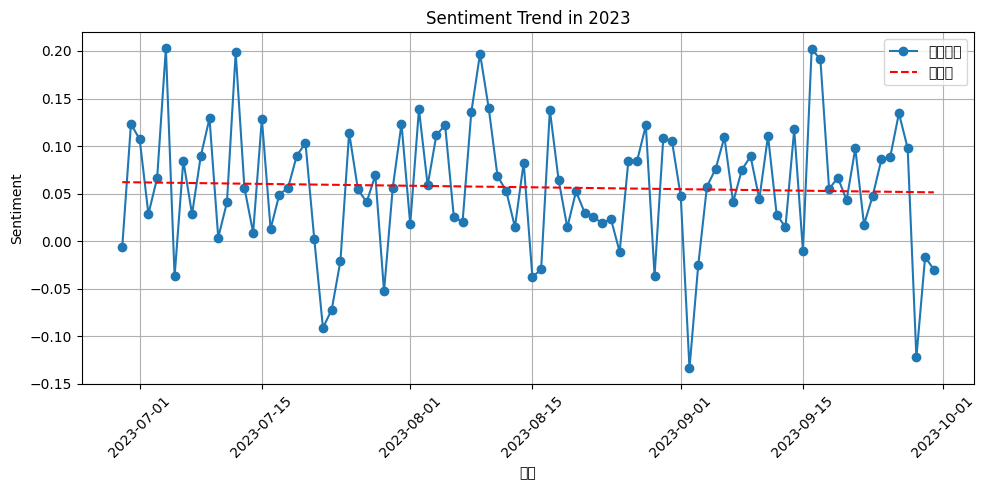

📊 变量: Sentiment, 斜率: -0.0001, p值: 0.6546, 趋势方向: 下降


<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 36235 (\N{CJK UNIFIED IDEOGRAPH-8D8B}) missing from

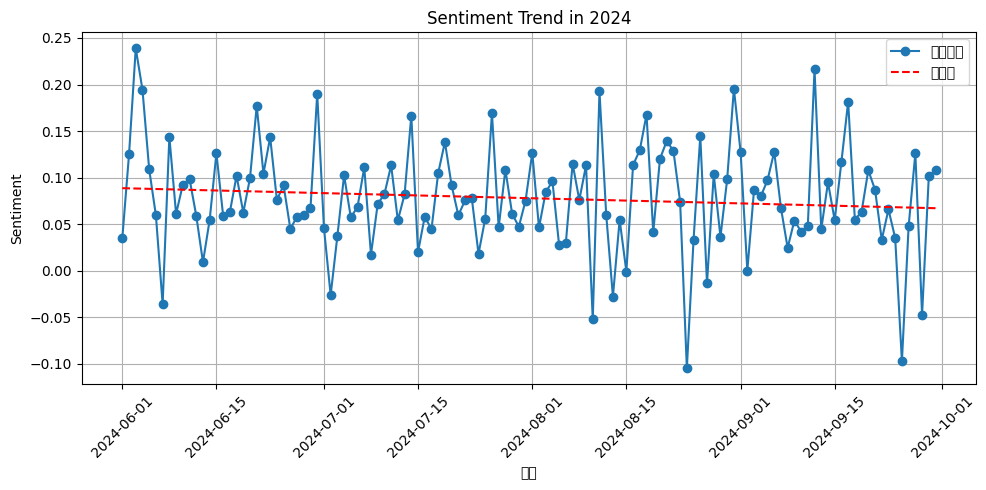

<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


📊 变量: Sentiment, 斜率: -0.0002, p值: 0.2365, 趋势方向: 下降


<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 36235 (\N{CJK UNIFIED IDEOGRAPH-8D8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 21183 (\N{CJK UNIFIED IDEOGRAPH-52BF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from

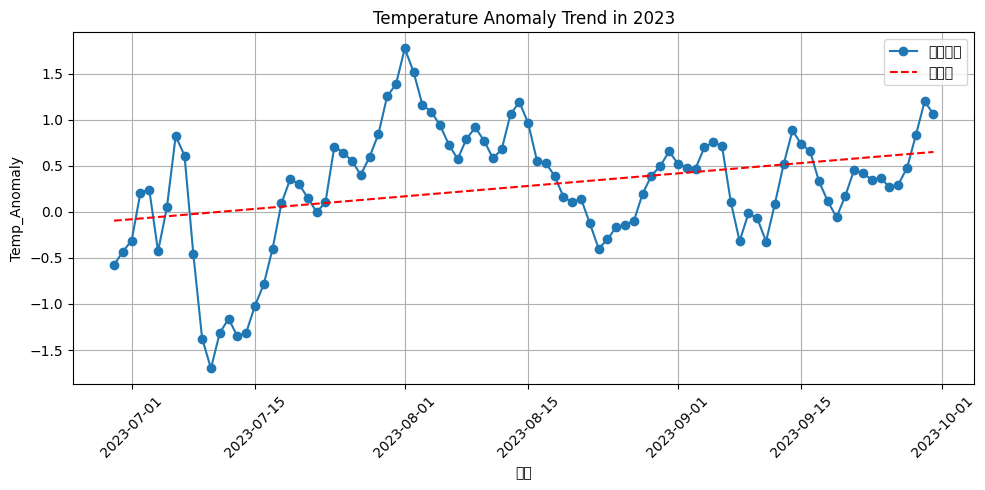

<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


📊 变量: Temp_Anomaly, 斜率: 0.008, p值: 0.0012, 趋势方向: 上升


<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 36235 (\N{CJK UNIFIED IDEOGRAPH-8D8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 21183 (\N{CJK UNIFIED IDEOGRAPH-52BF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-16-5aef70e6d743>:31: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from

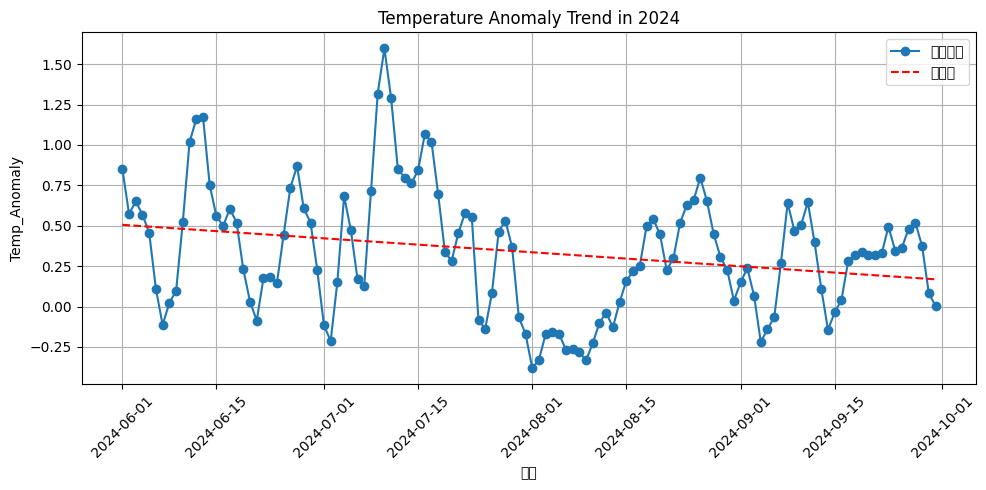

📊 变量: Temp_Anomaly, 斜率: -0.0028, p值: 0.0049, 趋势方向: 下降


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the data
df_all = pd.read_csv("2023和2024的放在一起.csv")  # "2023 and 2024 combined.csv"
df_all.columns = [col.strip() for col in df_all.columns]
df_all['Date'] = pd.to_datetime(df_all['Date'])

def plot_trend(df, column_name, title):
    df = df.copy()
    df = df.dropna(subset=[column_name])
    df = df.sort_values("Date")
    df["TimeIndex"] = range(len(df))

    # Linear regression fit
    X = sm.add_constant(df['TimeIndex'])
    model = sm.OLS(df[column_name], X).fit()
    trend_line = model.predict(X)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df[column_name], label='Original Data', marker='o')
    plt.plot(df['Date'], trend_line, color='red', linestyle='--', label='Trend Line')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display regression results
    slope = round(model.params['TimeIndex'], 4)
    p_value = round(model.pvalues['TimeIndex'], 4)
    direction = 'Increasing' if slope > 0 else 'Decreasing' if slope < 0 else 'No Trend'
    print(f'📊 Variable: {column_name}, Slope: {slope}, p-value: {p_value}, Trend Direction: {direction}')

# Separate data for 2023 and 2024
df_2023 = df_all[df_all['Year'] == 2023]
df_2024 = df_all[df_all['Year'] == 2024]

# Plot sentiment trends
plot_trend(df_2023, 'Sentiment', 'Sentiment Trend in 2023')
plot_trend(df_2024, 'Sentiment', 'Sentiment Trend in 2024')

# Plot temperature anomaly trends
plot_trend(df_2023, 'Temp_Anomaly', 'Temperature Anomaly Trend in 2023')
plot_trend(df_2024, 'Temp_Anomaly', 'Temperature Anomaly Trend in 2024')
